# Modeling

In this workshop we will work on using statistical models in python using statsmodels and performing machine learning using scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
%matplotlib inline
pd.set_option('display.max_columns', 80)

df = pd.read_csv("Data/Farmingham/handouts_fhs.csv", index_col=0)

In [2]:
df.head()

,death,angina,hospmi,mi_fchd,anychd,stroke,cvd,hyperten,timeap,timemi,timemifc,timechd,timestrk,timecvd,timedth,timehyp,sex1,totchol1,age1,sysbp1,diabp1,cursmoke1,cigpday1,bmi1,diabetes1,bpmeds1,heartrte1,glucose1,prevchd1,prevap1,prevmi1,prevstrk1,prevhyp1,hdlc1,ldlc1,sex2,totchol2,age2,sysbp2,diabp2,cursmoke2,cigpday2,bmi2,diabetes2,bpmeds2,heartrte2,glucose2,prevchd2,prevap2,prevmi2,prevstrk2,prevhyp2,hdlc2,ldlc2,sex3,totchol3,age3,sysbp3,diabp3,cursmoke3,cigpday3,bmi3,diabetes3,bpmeds3,heartrte3,glucose3,prevchd3,prevap3,prevmi3,prevstrk3,prevhyp3,hdlc3,ldlc3,bmidiff
randid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2448,No,No,Yes,Yes,Yes,No,Yes,No,24.000000,17.626283,17.626283,17.626283,24.00000,17.626284,24.000000,24.000000,Male,195.0,39,106.0,70.0,No,0.0,26.97,No,No,80.0,77.0,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,209.0,52.0,121.0,66.0,No,0.0,NaN,No,No,69.0,92.0,No,No,No,No,No,31.0,178.0,NaN
6238,No,No,No,No,No,No,No,No,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,Female,250.0,46,121.0,81.0,No,0.0,28.73,No,No,95.0,76.0,No,No,No,No,No,NaN,NaN,Female,260.0,52.0,105.0,69.5,No,0.0,29.43,No,No,80.0,86.0,No,No,No,No,No,NaN,NaN,Female,237.0,58.0,108.0,66.0,No,0.0,28.50,No,No,80.0,71.0,No,No,No,No,No,54.0,141.0,-0.70
9428,No,No,No,No,No,No,No,No,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,Male,245.0,48,127.5,80.0,Yes,20.0,25.34,No,No,75.0,70.0,No,No,No,No,No,NaN,NaN,Male,283.0,54.0,141.0,89.0,Yes,30.0,25.34,No,No,75.0,87.0,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
10552,Yes,No,No,No,No,Yes,Yes,Yes,8.093087,8.093087,8.093087,8.093087,5.71937,5.719370,8.093087,0.000000,Female,225.0,61,150.0,95.0,Yes,30.0,28.58,No,No,65.0,103.0,No,No,No,No,Yes,NaN,NaN,Female,232.0,67.0,183.0,109.0,Yes,20.0,30.18,No,No,60.0,89.0,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.60
11252,No,No,No,No,No,No,No,Yes,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,11.731691,Female,285.0,46,130.0,84.0,Yes,23.0,23.10,No,No,85.0,85.0,No,No,No,No,No,NaN,NaN,Female,343.0,51.0,109.0,77.0,Yes,30.0,23.48,No,No,90.0,72.0,No,No,No,No,No,NaN,NaN,Female,NaN,58.0,155.0,90.0,Yes,30.0,24.61,No,No,74.0,NaN,No,No,No,No,Yes,NaN,NaN,-0.38


## Statistical tests

### Power calculations
For example let's examine the relationship between age at first examination and hospitalization for myocardial infarction

$H_0$ - There's no difference in mean age at first exam between people that were later hospitalized for MI and people who didn't

$H_1$ - There's a differnce

We thus want to calculate the power to detect a difference of 1.5 years

In [3]:
assert (not df.age1.isna().any()) and (not df.hospmi.isna().any())

print(f"standard deviation in age1: {df.age1.std():.2f}")
effect_size = 1.5/df.age1.std()
nobs1 = (df.hospmi=="Yes").sum()
alpha=0.05
ratio = (df.hospmi=="No").sum()/nobs1
print(effect_size, nobs1,alpha,round(ratio,2))

power_analysis = sm.stats.TTestIndPower()
power_analysis.power(effect_size, nobs1, alpha, ratio=ratio)

standard deviation in age1: 8.68
0.17287221672682077 454 0.05 8.77


0.9368739739523522

We can also plot the power analysis:

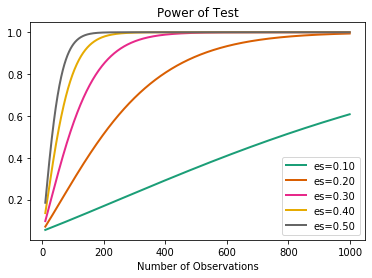

In [4]:
power_analysis.plot_power(dep_var='nobs', 
                    nobs=np.arange(10,1000), 
                    effect_size=np.arange(0.1,0.6,0.1))
plt.show()

### t-tests
We see that we have the required power (>0.8)

We now want to test this hypothesis using a t-test

In [5]:
# difference in means:
x1 = df.query("hospmi=='Yes'")['age1']
x2 = df.query("hospmi=='No'")['age1']

print(x1.mean()-x2.mean())

2.1905629468930528


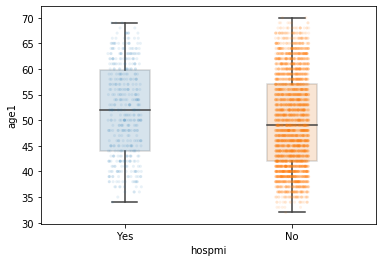

In [6]:
fig, ax = plt.subplots()

sns.boxplot(x="hospmi", y="age1", data=df, width=0.3, boxprops=dict(alpha=0.2))

# Add in points to show each observation
sns.stripplot(x="hospmi", y="age1", data=df, size=3, alpha=0.1)

plt.show(fig)

Visually it seams that there is a difference, let's check

In [7]:
scipy.stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=5.110793325815549, pvalue=3.3431210634355005e-07)

Similarly we can use statsmodels:

In [8]:
sm.stats.ttest_ind(df.query("hospmi=='Yes'")['age1'], 
                     df.query("hospmi=='No'")['age1'])

(5.110793325815549, 3.3431210634355005e-07, 4432.0)

It seems that we can indeed reject $H_0$ at an $\alpha=0.05$

### $\chi^2$ (Chi square) test

We want to test whether two categorical features are independent 
Specifically we will test if hypertension and stroke are independent

$H_0$ - HTN and stroke are independent

$H_1$ - They are not independent

In [9]:
"""
first some basic probability:
if two random variables are independent then:
P(A|B) = P(B|A) = P(A,B)
"""
assert (not df.stroke.isna().any()) and (not df.hyperten.isna().any())

p_a = (df.stroke=="Yes").sum() / df.shape[0]
p_b = (df.hyperten=="Yes").sum() / df.shape[0]

p_ab = (df.query("hyperten=='Yes'&stroke=='Yes'").shape[0]/df.shape[0]) 
p_a_given_b = p_ab / p_b

print(p_a*p_b, p_a_given_b)

0.06864473868123243 0.11531365313653136


Doesn't seem like independence..

In [10]:
chi_table = df.groupby(["hyperten","stroke"]).\
               count()['death'].\
               unstack()
chi_table

stroke,No,Yes
hyperten,,
No,1142,40
Yes,2877,375


In [11]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(chi_table)
print(f"p-value: {p:.2e}\nexpected freq.:")
pd.DataFrame(expected, index=['HTN:No', "HTN:Yes"],
            columns=['Stroke:No','Stroke:Yes'])

p-value: 2.90e-16
expected freq.:


,Stroke:No,Stroke:Yes
HTN:No,1071.370771,110.629229
HTN:Yes,2947.629229,304.370771


In [12]:
expected

array([[1071.37077131,  110.62922869],
       [2947.62922869,  304.37077131]])

In [13]:
total = chi_table.sum(1)
chi_table = (chi_table.T / total).T
chi_table['total'] = total
chi_table

stroke,No,Yes,total
hyperten,,,
No,0.966159,0.033841,1182
Yes,0.884686,0.115314,3252


## Machine Learning